In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

## Solution 2

In [2]:
def my_num_diff(f, a, b, n, option):
    x = np.linspace(a, b, n)
    h = x[1] - x[0]
            
    if option == 'central':
        return [(f(x + h)[1:-1] - f(x - h)[1:-1])/(2*h), x[1:-1]]
    elif option == 'forward':
        return [(f(x + h)[:-1] - f(x)[:-1])/h, x[:-1]]
    elif option == 'backward':
        return [(f(x)[1:] - f(x - h)[1:])/h, x[1:]]

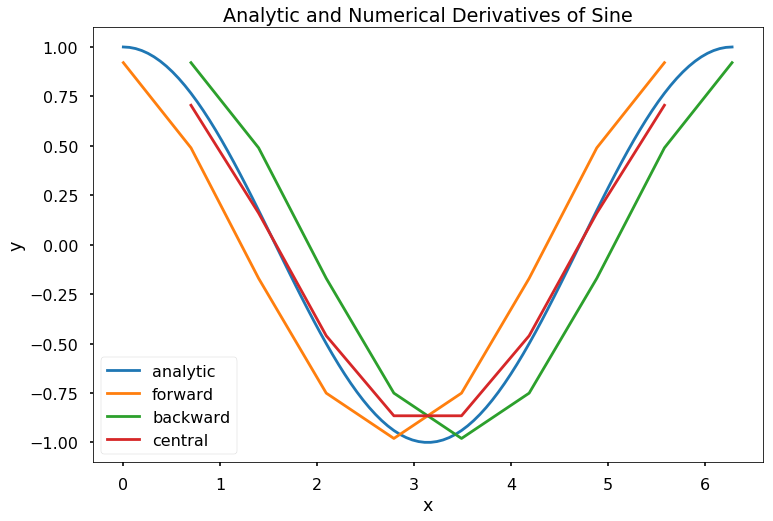

In [3]:
x = np.linspace(0, 2*np.pi, 100)
f = lambda x: np.sin(x)

[dyf, Xf] = my_num_diff(f, 0, 2*np.pi, 10, 'forward')
[dyb, Xb] = my_num_diff(f, 0, 2*np.pi, 10, 'backward')
[dyc, Xc] = my_num_diff(f, 0, 2*np.pi, 10, 'central')

plt.figure(figsize = (12, 8))
plt.plot(x, np.cos(x), label = 'analytic')
plt.plot(Xf, dyf, label = 'forward')
plt.plot(Xb, dyb, label = 'backward')
plt.plot(Xc, dyc, label = 'central')
plt.legend()
plt.title('Analytic and Numerical Derivatives of Sine')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

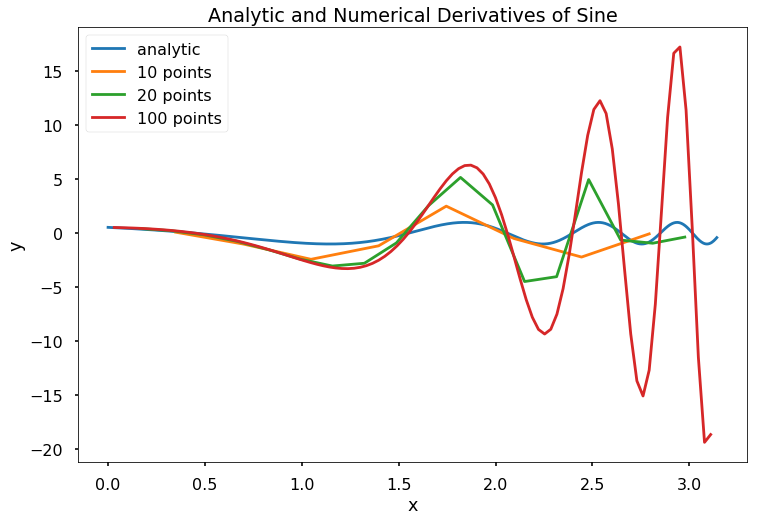

In [4]:
x = np.linspace(0, np.pi, 1000)
f = lambda x: np.sin(np.exp(x))

[dy10, X10] = my_num_diff(f, 0, np.pi, 10, 'central')
[dy20, X20] = my_num_diff(f, 0, np.pi, 20, 'central')
[dy100, X100] = my_num_diff(f, 0, np.pi, 100, 'central')

plt.figure(figsize = (12, 8))
plt.plot(x, np.cos(np.exp(x)), label = 'analytic')
plt.plot(X10, dy10, label = '10 points')
plt.plot(X20, dy20, label = '20 points')
plt.plot(X100, dy100, label = '100 points')
plt.legend()
plt.title('Analytic and Numerical Derivatives of Sine')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Solution 3

In [7]:
def my_num_diff_w_smoothing(x, y, n):
    y_smooth = []
    X_ix = []
    for i in range(n, len(y)-n + 1):
        y_smooth.append(np.mean(y[i-n:i+n]))
        X_ix.append(i)
            
    y_smooth = np.array(y_smooth)
    
    h = x[1] - x[0]
    dy = (y_smooth[2:] - y_smooth[0:len(y_smooth)-2])/(2*h)
    X = x[X_ix][1:-1]
        
    return [dy, X]

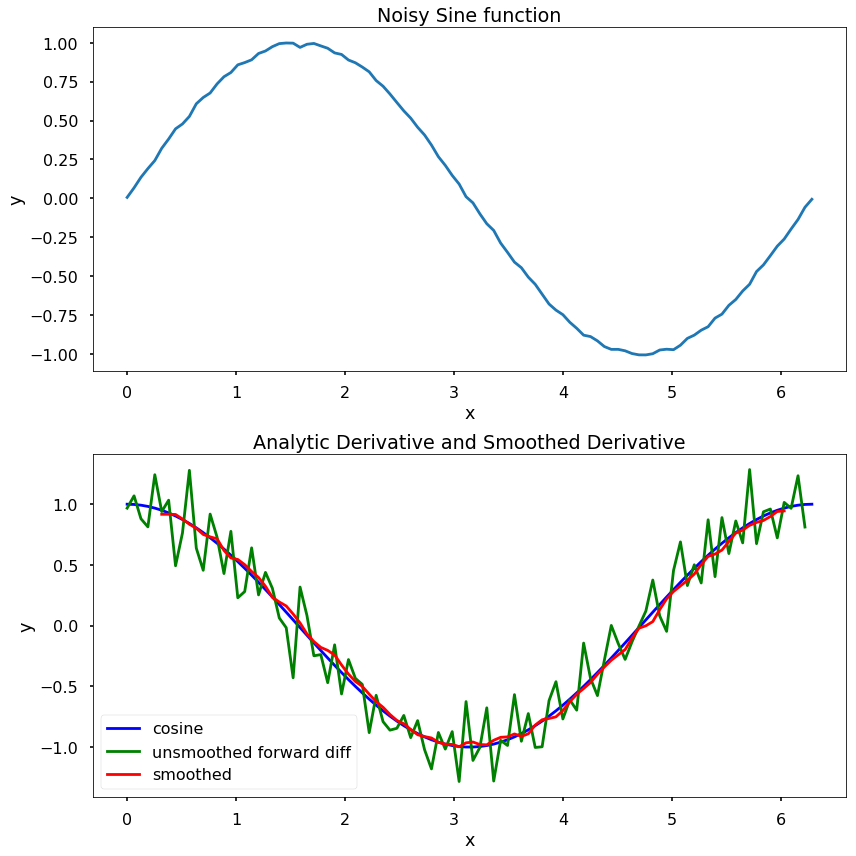

In [8]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x) + np.random.randn(len(x))/100

[dy, X] = my_num_diff_w_smoothing(x, y, 4)

plt.figure(figsize = (12, 12))
plt.subplot(211)
plt.plot(x, y)
plt.title('Noisy Sine function')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(212)
plt.plot(x, np.cos(x), 'b', label = 'cosine')
plt.plot(x[:-1], (y[1:] - y[:-1])/(x[1]-x[0]), 'g', label = 'unsmoothed forward diff')
plt.plot(X, dy, 'r', label = 'smoothed')
plt.title('Analytic Derivative and Smoothed Derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()